I got these data from: https://ews.kemendag.go.id/Rdesign_daerah.aspx

# Import libraries

In [1]:
# import library
import pandas as pd
import numpy as np

# Playground

In [2]:
path = '/content/drive/MyDrive/data_anal_project/comodity_prices/National_per year/HargaPerDaerah (29-11-2021) 2021.xls'
df_example = pd.read_excel(path, header= 0,
                     index_col= False)
df_example.reset_index()
df_example.head(8)

WARNING *** file size (45117) not 512 + multiple of sector size (512)


,LAPORAN HARGA RATA-RATA KOMODITAS PERKOTA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NASIONAL TAHUN 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provinsi,NaN,:,Nasional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kabupaten/Kota,NaN,:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pasar,NaN,:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NO,Komoditas,Tanggal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rata-Rata
6,NaN,NaN,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Agus,Sep,Okt,Nov,NaN
7,1,Bawang Merah,31948.6,31558,34183.4,32600.5,32225.4,30752.4,32482.6,33502.7,29167.2,28275.9,26957.2,0


In [3]:
df_example_rename_col = df_example.rename(columns={'LAPORAN HARGA RATA-RATA KOMODITAS PERKOTA': 'No.', 
                                                   'Unnamed: 1': 'Tanggal' + ' Berapa',
                                                   'Unnamed: 2': 'Jan 2016',
                                                   'Unnamed: 3': 'Feb 2016',
                                                   'Unnamed: 4': 'Mar 2016',
                                                   'Unnamed: 5': 'Apr 2016',
                                                   'Unnamed: 6': 'Mei 2016',
                                                   'Unnamed: 7': 'Jun 2016',
                                                   'Unnamed: 8': 'Jul 2016',
                                                   'Unnamed: 9': 'Aug 2016',
                                                   'Unnamed: 10': 'Sep 2016',
                                                   'Unnamed: 11': 'Okt 2016',
                                                   'Unnamed: 12': 'Nov 2016',
                                                   'Unnamed: 13': 'Des 2016',
                                                   'Unnamed: 14': 'Rata-Rata',
                                                   })
df_example_rename_col.head(10)

,No.,Tanggal Berapa,Jan 2016,Feb 2016,Mar 2016,Apr 2016,Mei 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Okt 2016,Nov 2016,Des 2016
0,NASIONAL TAHUN 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provinsi,NaN,:,Nasional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kabupaten/Kota,NaN,:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pasar,NaN,:,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NO,Komoditas,Tanggal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rata-Rata
6,NaN,NaN,Jan,Feb,Mar,Apr,Mei,Jun,Jul,Agus,Sep,Okt,Nov,NaN
7,1,Bawang Merah,31948.6,31558,34183.4,32600.5,32225.4,30752.4,32482.6,33502.7,29167.2,28275.9,26957.2,0
8,2,Bawang Putih Honan,26868.5,27430.7,28346.3,28633.5,29022.1,28662.9,28869.6,29058.1,28292.4,28174.8,28004.4,0
9,3,Bawang Putih Kating,28000.5,29427.1,29864.6,29137.1,29178.1,29439,27878.7,30006.9,28397.1,29111.7,29348.1,0


In [4]:
df_example_drop1 = df_example_rename_col.drop(df_example_rename_col.index[range(7)])
df_example_drop1.head(10)

,No.,Tanggal Berapa,Jan 2016,Feb 2016,Mar 2016,Apr 2016,Mei 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Okt 2016,Nov 2016,Des 2016
7,1,Bawang Merah,31948.6,31558,34183.4,32600.5,32225.4,30752.4,32482.6,33502.7,29167.2,28275.9,26957.2,0
8,2,Bawang Putih Honan,26868.5,27430.7,28346.3,28633.5,29022.1,28662.9,28869.6,29058.1,28292.4,28174.8,28004.4,0
9,3,Bawang Putih Kating,28000.5,29427.1,29864.6,29137.1,29178.1,29439,27878.7,30006.9,28397.1,29111.7,29348.1,0
10,4,Beras Medium,10588.2,10666,10712.1,10782.4,10574.2,10556.2,10351.8,10330.1,10305.4,10291.5,10279.7,0
11,5,Beras Premium,12382.1,12442,12443.1,12398.6,12417.7,12371,12317.9,12334.8,12319.5,12332.1,12337.6,0
12,6,Cabe Merah Besar,46877.9,45512,46094.5,46977.7,40720.6,31779.6,34270.3,28558.3,27264.6,32191.5,37334.3,0
13,7,Cabe Merah Keriting,50885.5,46842.8,48200.5,46589.1,38593.8,31304,35913.5,28375.2,26915.7,32269.3,38814,0
14,8,Cabe Rawit Merah,75556.5,80394.7,93695.1,77108.3,65219.9,55755,68180.1,49854.5,38197.7,40469.9,39874.4,0
15,9,Daging Ayam Ras,34697.1,33735.7,33985.2,35806.7,37091.7,36470,34025.4,32361.6,34165.2,35162.8,35100.3,0
16,10,Daging Sapi Paha Belakang,121203,121788,122033,123613,127921,125634,126470,126000,125481,125473,125602,0


In [5]:
df_example_drop2 = df_example_drop1.drop(labels=["No."], axis=1)
df_example_drop2.head()

,Tanggal Berapa,Jan 2016,Feb 2016,Mar 2016,Apr 2016,Mei 2016,Jun 2016,Jul 2016,Aug 2016,Sep 2016,Okt 2016,Nov 2016,Des 2016
7,Bawang Merah,31948.6,31558,34183.4,32600.5,32225.4,30752.4,32482.6,33502.7,29167.2,28275.9,26957.2,0
8,Bawang Putih Honan,26868.5,27430.7,28346.3,28633.5,29022.1,28662.9,28869.6,29058.1,28292.4,28174.8,28004.4,0
9,Bawang Putih Kating,28000.5,29427.1,29864.6,29137.1,29178.1,29439,27878.7,30006.9,28397.1,29111.7,29348.1,0
10,Beras Medium,10588.2,10666,10712.1,10782.4,10574.2,10556.2,10351.8,10330.1,10305.4,10291.5,10279.7,0
11,Beras Premium,12382.1,12442,12443.1,12398.6,12417.7,12371,12317.9,12334.8,12319.5,12332.1,12337.6,0


In [7]:
# df_example_drop3 = df_example_drop2.drop(labels=['Rata-Rata'], axis=1)
# df_example_drop3.head()

In [8]:
# df_example_drop2['Rata-Rata']

In [10]:
# df_example_dataframe = pd.DataFrame(data = df_example_drop3)
# df_example_dataframe.head()

In [11]:
# df_example_dataframe.reset_index(drop=True, inplace=True)
# df_example_dataframe.head()

In [12]:
# # transpose
# df_example_transpose = df_example_dataframe.transpose()

# df_example_transpose

In [13]:
# new_header = df_example_transpose.iloc[0] #grab the first row for the header
# df_example_transpose = df_example_transpose[1:] #take the data less the header row
# df_example_transpose.columns = new_header #set the header row as the df header

In [15]:
# df_example_transpose.head()

# Functions

## To extract data

In [16]:
def extract_transform_data(path_diff, year):
  path = path_diff
  df = pd.read_excel(path, header= 0,
                     index_col= False)

  df_rename_col = df.rename(columns={'LAPORAN HARGA RATA-RATA KOMODITAS PERKOTA': 'No.', 
                                      'Unnamed: 1': 'Date',
                                      'Unnamed: 2': 'Jan '+ str(year),
                                      'Unnamed: 3': 'Feb '+ str(year),
                                      'Unnamed: 4': 'Mar '+ str(year),
                                      'Unnamed: 5': 'Apr '+ str(year),
                                      'Unnamed: 6': 'May '+ str(year),
                                      'Unnamed: 7': 'Jun '+ str(year),
                                      'Unnamed: 8': 'Jul '+ str(year),
                                      'Unnamed: 9': 'Aug '+ str(year),
                                      'Unnamed: 10': 'Sep '+ str(year),
                                      'Unnamed: 11': 'Oct '+ str(year),
                                      'Unnamed: 12': 'Nov '+ str(year),
                                      'Unnamed: 13': 'Dec '+ str(year),
                                      'Unnamed: 14': 'Rata-Rata',
                                      })
  df_drop1 = df_rename_col.drop(df_rename_col.index[range(7)])
  df_drop2 = df_drop1.drop(labels=['No.'], axis=1)

  if 'Rata-Rata' in df_drop2:
    df_drop2 = df_drop2.drop(labels=['Rata-Rata'], axis=1)

  df_transpose = df_drop2.transpose()

  new_header = df_transpose.iloc[0] #grab the first row for the header
  df_transpose = df_transpose[1:] #take the data less the header row
  df_transpose.columns = new_header #set the header row as the df header

  return df_transpose



In [17]:
# Try
# Data from 2021
year_diff = '2021'
path_diff = '/content/drive/MyDrive/data_anal_project/comodity_prices/National_per year/HargaPerDaerah (29-11-2021) ' + year_diff + '.xls'

extract_transform_data(path_diff, year_diff)

WARNING *** file size (45117) not 512 + multiple of sector size (512)


Date,Bawang Merah,Bawang Putih Honan,Bawang Putih Kating,Beras Medium,Beras Premium,Cabe Merah Besar,Cabe Merah Keriting,Cabe Rawit Merah,Daging Ayam Ras,Daging Sapi Paha Belakang,Gula Pasir,Kedelai Impor,Minyak Goreng Curah,Minyak Goreng Kemasan,Minyak Goreng Kemasan Sederhana,Telur Ayam Ras,Tepung Terigu
Jan 2021,31948.6,26868.5,28000.5,10588.2,12382.1,46877.9,50885.5,75556.5,34697.1,121203,13113.7,11244.5,12250.9,15031.2,13120.5,26848.9,9944.48
Feb 2021,31558,27430.7,29427.1,10666,12442,45512,46842.8,80394.7,33735.7,121788,13121.2,11530.6,12380.7,15107.4,13228.8,26058.4,10013.9
Mar 2021,34183.4,28346.3,29864.6,10712.1,12443.1,46094.5,48200.5,93695.1,33985.2,122033,13102.3,11748.6,12572.4,15231,13471.2,25473.3,10109.8
Apr 2021,32600.5,28633.5,29137.1,10782.4,12398.6,46977.7,46589.1,77108.3,35806.7,123613,13102.6,11861.5,12776.2,15328.9,13633.2,25902.5,10169.3
May 2021,32225.4,29022.1,29178.1,10574.2,12417.7,40720.6,38593.8,65219.9,37091.7,127921,13047.3,12119.9,13220.3,15543.8,13787.5,26023.2,10217.2
Jun 2021,30752.4,28662.9,29439,10556.2,12371,31779.6,31304,55755,36470,125634,13039,12346.5,13293.7,15715,13992.2,26223.3,10182.6
Jul 2021,32482.6,28869.6,27878.7,10351.8,12317.9,34270.3,35913.5,68180.1,34025.4,126470,13006.6,12463.7,13333.8,15828.5,14121.3,25922.6,10190.4
Aug 2021,33502.7,29058.1,30006.9,10330.1,12334.8,28558.3,28375.2,49854.5,32361.6,126000,12977.1,12466.5,13810.7,16009.2,14299.3,25752.8,10186.6
Sep 2021,29167.2,28292.4,28397.1,10305.4,12319.5,27264.6,26915.7,38197.7,34165.2,125481,12957.6,12444.1,14136.1,16333.5,14534.3,24312.7,10215.7
Oct 2021,28275.9,28174.8,29111.7,10291.5,12332.1,32191.5,32269.3,40469.9,35162.8,125473,12964.5,12355.4,14786.6,16786.7,15193.5,23726.6,10237.2


In [18]:
# concat all dataframe from 2016 to 2021
years = ['2021', '2020', '2019', '2018', '2017', '2016']
appended_df = []

for i in years:
  year_diff = i
  path_diff = '/content/drive/MyDrive/data_anal_project/comodity_prices/National_per year/HargaPerDaerah (29-11-2021) ' + i + '.xls'
  df_each = extract_transform_data(path_diff, year_diff)
  appended_df.append(df_each)
  
df_final = pd.concat(appended_df)
# appended_data = pd.concat(appended_data)


WARNING *** file size (45117) not 512 + multiple of sector size (512)
WARNING *** file size (45651) not 512 + multiple of sector size (512)
WARNING *** file size (45651) not 512 + multiple of sector size (512)
WARNING *** file size (45651) not 512 + multiple of sector size (512)
WARNING *** file size (45139) not 512 + multiple of sector size (512)
WARNING *** file size (44605) not 512 + multiple of sector size (512)


In [19]:
print(df_final)

         Bawang Merah Bawang Putih Honan  ... Telur Ayam Ras Tepung Terigu
Jan 2021      31948.6            26868.5  ...        26848.9       9944.48
Feb 2021        31558            27430.7  ...        26058.4       10013.9
Mar 2021      34183.4            28346.3  ...        25473.3       10109.8
Apr 2021      32600.5            28633.5  ...        25902.5       10169.3
May 2021      32225.4            29022.1  ...        26023.2       10217.2
...               ...                ...  ...            ...           ...
Aug 2016      41040.6            36092.6  ...        24049.6       8880.15
Sep 2016      40477.5            36416.5  ...        23469.3       8865.58
Oct 2016      36390.9            36224.5  ...          22920       8868.81
Nov 2016      41273.8            37536.1  ...        22401.1        8891.9
Dec 2016      40066.6            38537.3  ...          23488       8856.64

[72 rows x 17 columns]


In [26]:
date = df_final.index
print(date)

Index(['Jan 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'May 2021', 'Jun 2021',
       'Jul 2021', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021',
       'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020',
       'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020',
       'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019',
       'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019',
       'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018', 'Jun 2018',
       'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018',
       'Jan 2017', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017',
       'Jul 2017', 'Aug 2017', 'Sep 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017',
       'Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016',
       'Jul 2016', 'Aug 2016', 'Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016'],
      dtype='object')


In [27]:
df_final = df_final.assign(date=date)

In [28]:
df_final.head()

,Bawang Merah,Bawang Putih Honan,Bawang Putih Kating,Beras Medium,Beras Premium,Cabe Merah Besar,Cabe Merah Keriting,Cabe Rawit Merah,Daging Ayam Ras,Daging Sapi Paha Belakang,Gula Pasir,Kedelai Impor,Minyak Goreng Curah,Minyak Goreng Kemasan,Minyak Goreng Kemasan Sederhana,Telur Ayam Ras,Tepung Terigu,date
Jan 2021,31948.6,26868.5,28000.5,10588.2,12382.1,46877.9,50885.5,75556.5,34697.1,121203,13113.7,11244.5,12250.9,15031.2,13120.5,26848.9,9944.48,Jan 2021
Feb 2021,31558,27430.7,29427.1,10666,12442,45512,46842.8,80394.7,33735.7,121788,13121.2,11530.6,12380.7,15107.4,13228.8,26058.4,10013.9,Feb 2021
Mar 2021,34183.4,28346.3,29864.6,10712.1,12443.1,46094.5,48200.5,93695.1,33985.2,122033,13102.3,11748.6,12572.4,15231,13471.2,25473.3,10109.8,Mar 2021
Apr 2021,32600.5,28633.5,29137.1,10782.4,12398.6,46977.7,46589.1,77108.3,35806.7,123613,13102.6,11861.5,12776.2,15328.9,13633.2,25902.5,10169.3,Apr 2021
May 2021,32225.4,29022.1,29178.1,10574.2,12417.7,40720.6,38593.8,65219.9,37091.7,127921,13047.3,12119.9,13220.3,15543.8,13787.5,26023.2,10217.2,May 2021


In [29]:
# check the data type and missing value
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, Jan 2021 to Dec 2016
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Bawang Merah                     72 non-null     object
 1   Bawang Putih Honan               72 non-null     object
 2   Bawang Putih Kating              54 non-null     object
 3   Beras Medium                     72 non-null     object
 4   Beras Premium                    46 non-null     object
 5   Cabe Merah Besar                 72 non-null     object
 6   Cabe Merah Keriting              72 non-null     object
 7   Cabe Rawit Merah                 72 non-null     object
 8   Daging Ayam Ras                  72 non-null     object
 9   Daging Sapi Paha Belakang        72 non-null     object
 10  Gula Pasir                       72 non-null     object
 11  Kedelai Impor                    72 non-null     object
 12  Minyak Goreng Curah           

In [47]:
# check column
df_cols = df_final.columns
df_cols

Index(['Bawang Merah', 'Bawang Putih Honan', 'Bawang Putih Kating',
       'Beras Medium', 'Beras Premium', 'Cabe Merah Besar',
       'Cabe Merah Keriting', 'Cabe Rawit Merah', 'Daging Ayam Ras',
       'Daging Sapi Paha Belakang', 'Gula Pasir', 'Kedelai Impor',
       'Minyak Goreng Curah', 'Minyak Goreng Kemasan',
       'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras', 'Tepung Terigu',
       'date'],
      dtype='object')

In [33]:
# take date column
date_col = df_final.columns[-1]


'date'

In [37]:
# Change date to datetime 
df_final[date_col] =  pd.to_datetime(df_final[date_col])

In [36]:
# take all column except date
commodity_col = df_final.columns[0:-1]
commodity_col

Index(['Bawang Merah', 'Bawang Putih Honan', 'Bawang Putih Kating',
       'Beras Medium', 'Beras Premium', 'Cabe Merah Besar',
       'Cabe Merah Keriting', 'Cabe Rawit Merah', 'Daging Ayam Ras',
       'Daging Sapi Paha Belakang', 'Gula Pasir', 'Kedelai Impor',
       'Minyak Goreng Curah', 'Minyak Goreng Kemasan',
       'Minyak Goreng Kemasan Sederhana', 'Telur Ayam Ras', 'Tepung Terigu'],
      dtype='object')

In [40]:
# Change commodity col to float 
# df_final[commodity_col] = pd.to_numeric(df_final[commodity_col], errors = 'coerce')

df_final[commodity_col] = df_final[commodity_col].astype(float, errors = 'raise')

In [41]:
df_final.head()

,Bawang Merah,Bawang Putih Honan,Bawang Putih Kating,Beras Medium,Beras Premium,Cabe Merah Besar,Cabe Merah Keriting,Cabe Rawit Merah,Daging Ayam Ras,Daging Sapi Paha Belakang,Gula Pasir,Kedelai Impor,Minyak Goreng Curah,Minyak Goreng Kemasan,Minyak Goreng Kemasan Sederhana,Telur Ayam Ras,Tepung Terigu,date
Jan 2021,31948.562188,26868.454309,28000.465671,10588.170044,12382.102412,46877.893989,50885.467253,75556.501265,34697.134568,121202.674859,13113.694112,11244.532728,12250.900952,15031.205770,13120.520811,26848.912791,9944.479006,2021-01-01
Feb 2021,31558.041809,27430.699312,29427.087594,10665.996606,12441.971206,45512.017550,46842.795659,80394.682363,33735.722391,121788.377194,13121.160194,11530.631540,12380.685706,15107.445691,13228.753096,26058.425882,10013.870315,2021-02-01
Mar 2021,34183.433453,28346.339979,29864.622221,10712.088565,12443.087367,46094.494424,48200.460656,93695.052021,33985.197418,122032.644100,13102.304194,11748.571830,12572.379616,15230.996688,13471.175100,25473.346162,10109.817065,2021-03-01
Apr 2021,32600.468006,28633.496618,29137.060337,10782.387324,12398.609555,46977.721013,46589.135997,77108.256712,35806.719815,123613.112368,13102.564024,11861.543720,12776.241323,15328.853882,13633.157076,25902.548294,10169.332253,2021-04-01
May 2021,32225.365071,29022.117568,29178.085662,10574.240785,12417.704482,40720.648584,38593.804418,65219.894756,37091.696818,127921.231785,13047.280153,12119.869767,13220.283619,15543.782218,13787.498090,26023.163091,10217.161744,2021-05-01


In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, Jan 2021 to Dec 2016
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Bawang Merah                     72 non-null     float64       
 1   Bawang Putih Honan               72 non-null     float64       
 2   Bawang Putih Kating              54 non-null     float64       
 3   Beras Medium                     72 non-null     float64       
 4   Beras Premium                    46 non-null     float64       
 5   Cabe Merah Besar                 72 non-null     float64       
 6   Cabe Merah Keriting              72 non-null     float64       
 7   Cabe Rawit Merah                 72 non-null     float64       
 8   Daging Ayam Ras                  72 non-null     float64       
 9   Daging Sapi Paha Belakang        72 non-null     float64       
 10  Gula Pasir                       72 non-null     float64

In [44]:
# look at the missing value
df_final.isnull().sum()

Bawang Merah                        0
Bawang Putih Honan                  0
Bawang Putih Kating                18
Beras Medium                        0
Beras Premium                      26
Cabe Merah Besar                    0
Cabe Merah Keriting                 0
Cabe Rawit Merah                    0
Daging Ayam Ras                     0
Daging Sapi Paha Belakang           0
Gula Pasir                          0
Kedelai Impor                       0
Minyak Goreng Curah                 0
Minyak Goreng Kemasan               0
Minyak Goreng Kemasan Sederhana    18
Telur Ayam Ras                      0
Tepung Terigu                       0
date                                0
dtype: int64

In [58]:
# # Look at the outlier
# # df_final.plot(kind='box')

# import matplotlib.pyplot as plt

# red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

# fig, axs = plt.subplots(1, len(df_cols), figsize=(20, 10))

# for i, ax in enumerate(axs.flat):
#   ax.boxplot(df_final.iloc[:, i], flierprops=red_circle)
#   ax.set_title(df_cols[i], fontsize = 20, fontweight='bold')
#   ax.tick_params(axis='y', labelsize=14)

# plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  del sys.path[0]


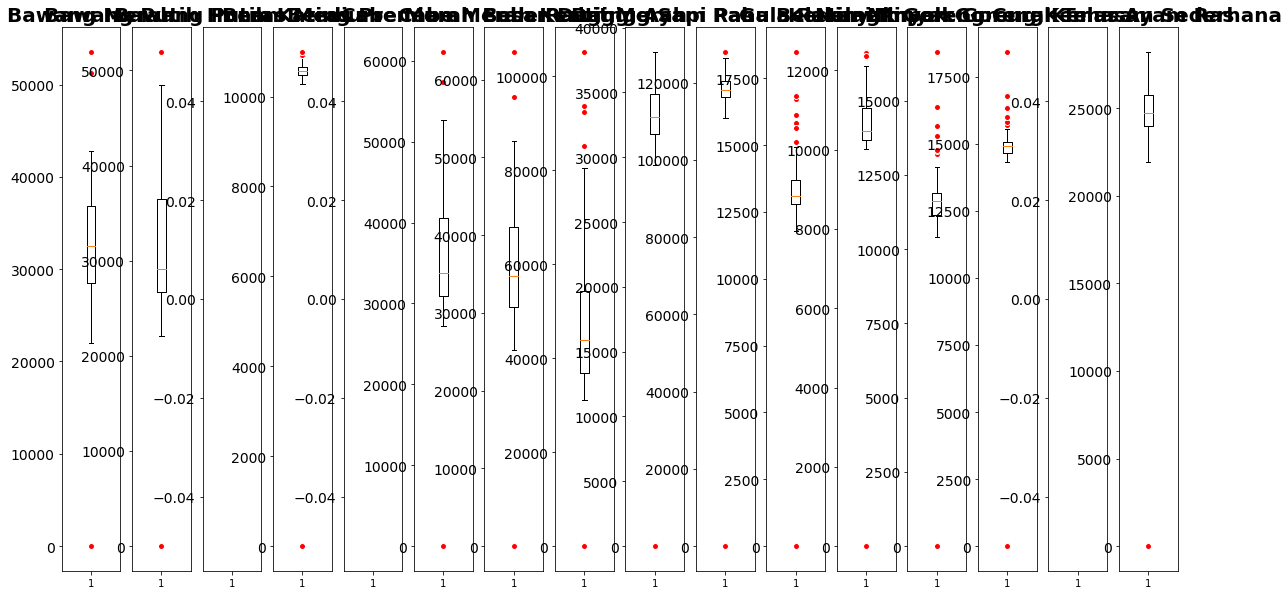

In [60]:

import matplotlib.pyplot as plt

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_cols[1:-1]), figsize=(20, 10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df_final.iloc[:, i], flierprops=red_circle)
  ax.set_title(df_cols[i], fontsize = 20, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

In [62]:
# since the data have outliers, we can impute the missing value with median
missing_col = ['Bawang Putih Kating', 'Beras Premium', 'Minyak Goreng Kemasan Sederhana']

for i in missing_col:
 df_final.loc[df_final.loc[:,i].isnull(),i]=df_final.loc[:,i].median()

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, Jan 2021 to Dec 2016
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Bawang Merah                     72 non-null     float64       
 1   Bawang Putih Honan               72 non-null     float64       
 2   Bawang Putih Kating              72 non-null     float64       
 3   Beras Medium                     72 non-null     float64       
 4   Beras Premium                    72 non-null     float64       
 5   Cabe Merah Besar                 72 non-null     float64       
 6   Cabe Merah Keriting              72 non-null     float64       
 7   Cabe Rawit Merah                 72 non-null     float64       
 8   Daging Ayam Ras                  72 non-null     float64       
 9   Daging Sapi Paha Belakang        72 non-null     float64       
 10  Gula Pasir                       72 non-null     float64

In [64]:
# to csv
path = '/content/drive/MyDrive/data_anal_project/comodity_prices/ready_file/'
df_final.to_csv(path+'national_2016-2021.csv', index=False, encoding='utf-8')